## Download CHL Data

In [16]:
!mkdir -p chl_data

for y in range(1997, 2000):
    !wget -e robots=off -nd -r -np -l1 \
          -A "S{y}*_chl_comp.hdf" \
          https://spg-satdata.ucsd.edu/{y}/S{y}_chl_day/ \
          -P chl_data

--2026-02-04 13:25:10--  https://spg-satdata.ucsd.edu/1997/S1997_chl_day/
Resolving spg-satdata.ucsd.edu (spg-satdata.ucsd.edu)... 169.228.224.44
Connecting to spg-satdata.ucsd.edu (spg-satdata.ucsd.edu)|169.228.224.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘chl_data/index.html.tmp’

index.html.tmp          [ <=>                ]  44.59K  --.-KB/s    in 0s      

2026-02-04 13:25:10 (93.2 MB/s) - ‘chl_data/index.html.tmp’ saved [45661]

Removing chl_data/index.html.tmp since it should be rejected.

--2026-02-04 13:25:10--  https://spg-satdata.ucsd.edu/1997/S1997_chl_day/?C=N;O=D
Reusing existing connection to spg-satdata.ucsd.edu:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘chl_data/index.html?C=N;O=D.tmp’

index.html?C=N;O=D.     [ <=>                ]  44.59K  --.-KB/s    in 0s      

2026-02-04 13:25:10 (182 MB/s) - ‘chl_data/index.html?C=N;O=D.tmp’ saved [45661]


In [17]:
for y in range(2000, 2008):
    !wget -e robots=off -nd -r -np -l1 \
          -A "C{y}*_chl_comp.hdf" \
          https://spg-satdata.ucsd.edu/{y}/C{y}_chl_day/ \
          -P chl_data

--2026-02-04 13:25:17--  https://spg-satdata.ucsd.edu/2000/C2000_chl_day/
Resolving spg-satdata.ucsd.edu (spg-satdata.ucsd.edu)... 169.228.224.44
Connecting to spg-satdata.ucsd.edu (spg-satdata.ucsd.edu)|169.228.224.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘chl_data/index.html.tmp’

index.html.tmp          [ <=>                ] 243.84K  --.-KB/s    in 0.002s  

2026-02-04 13:25:17 (97.0 MB/s) - ‘chl_data/index.html.tmp’ saved [249694]

Removing chl_data/index.html.tmp since it should be rejected.

--2026-02-04 13:25:17--  https://spg-satdata.ucsd.edu/2000/C2000_chl_day/?C=N;O=D
Reusing existing connection to spg-satdata.ucsd.edu:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘chl_data/index.html?C=N;O=D.tmp’

index.html?C=N;O=D.     [ <=>                ] 243.84K  --.-KB/s    in 0.002s  

2026-02-04 13:25:17 (111 MB/s) - ‘chl_data/index.html?C=N;O=D.tmp’ saved [249694

In [18]:
from pyhdf.SD import SD, SDC

# Example file
file_path = "/Users/deliacarpenter/Desktop/Research/primary-productivity/data/chl_data/C2000001_chl_comp.hdf"

# Open the HDF file
hdf = SD(file_path, SDC.READ)

# List all datasets
print("Datasets in HDF file:", hdf.datasets())

Datasets in HDF file: {'chl_2000001': (('fakeDim0', 'fakeDim1'), (3405, 3840), 20, 0)}


In [19]:
chl_data = hdf.select('chl_2000001')[:]  # shape (rows, cols)
print("Shape of CHL array:", chl_data.shape)
print("Min/max CHL values:", chl_data.min(), chl_data.max())

Shape of CHL array: (3405, 3840)
Min/max CHL values: -128 127


In [20]:
sds = hdf.select('chl_2000001')
print(sds.attributes())

{'WIM Color Range': [0.0, 255.0], 'WIM Color Stretch': [48, 200], 'WIM Palette': [0, 0, 0, 50, 0, 75, 54, 0, 79, 58, 0, 84, 62, 0, 89, 65, 0, 94, 69, 0, 99, 73, 0, 104, 77, 0, 109, 81, 0, 114, 85, 0, 119, 88, 0, 124, 92, 0, 129, 96, 0, 134, 100, 0, 139, 104, 0, 143, 108, 0, 148, 111, 0, 153, 115, 0, 158, 119, 0, 163, 123, 0, 168, 127, 0, 173, 131, 0, 178, 135, 0, 183, 138, 0, 188, 142, 0, 193, 146, 0, 198, 150, 0, 203, 154, 0, 208, 158, 0, 212, 162, 0, 217, 165, 0, 222, 169, 0, 227, 173, 0, 232, 177, 0, 237, 181, 0, 242, 185, 0, 247, 188, 0, 252, 188, 0, 254, 178, 0, 251, 169, 0, 249, 160, 0, 246, 150, 0, 244, 141, 0, 241, 132, 0, 239, 122, 0, 236, 113, 0, 234, 104, 0, 231, 95, 0, 229, 85, 0, 226, 76, 0, 224, 67, 0, 221, 57, 0, 219, 48, 0, 216, 39, 0, 214, 29, 0, 212, 20, 0, 209, 11, 0, 207, 2, 0, 204, 0, 2, 204, 0, 9, 206, 0, 16, 207, 0, 22, 208, 0, 29, 210, 0, 36, 211, 0, 43, 212, 0, 50, 214, 0, 56, 215, 0, 63, 216, 0, 70, 218, 0, 77, 219, 0, 83, 220, 0, 90, 222, 0, 97, 223, 0, 104, 

In [21]:
hdf.attributes()

{'history': 'master2 projection=albers min_lat=16 max_lat=45 min_lon=-135 max_lon=-100 corner_edges=yes square_aspect=yes num_samples=3840 est_center=yes\x00',
 'projection': 11,
 'et_affine': [-1.0003441042839527,
  0.0,
  0.0,
  1.0003441042839527,
  1703.0,
  1920.5],
 'projection_name': 'albers_conic\x00\x00\x00\x00',
 'center_lat': 30.996305002262538,
 'center_lon': -117.5,
 'map_angle': 0.0,
 'proj_param': 0.0,
 'equator_radius': 6378.137,
 'flattening': 0.003352810665,
 'time_coverage_start': '20000101000000Z\x00',
 'time_coverage_end': '20000101000000Z\x00',
 'Software': 'wam_composite_sensors\x00',
 'SoftwareVersion': 'vers. 1.17\x00',
 'Information': 'WIM/WAM, http://www.wimsoft.com\x00',
 'Contact': 'mkahru@ucsd.edu\x00',
 'Flags_used': 'ATMFAIL,LAND,HIGLINT,HILT,HISATZEN,CLDICE,HISOLZEN,LOWLW,CHLFAIL,NAVFAIL\x00',
 'FlagNumbers_used': '0,1,3,4,5,9,12,14,15,25\x00',
 'Input files': 'S2000001_chl_mapped.hdf,\x00',
 'TargetProjectionFile': 'cal_aco_3840.hdf\x00',
 'Sensor Name

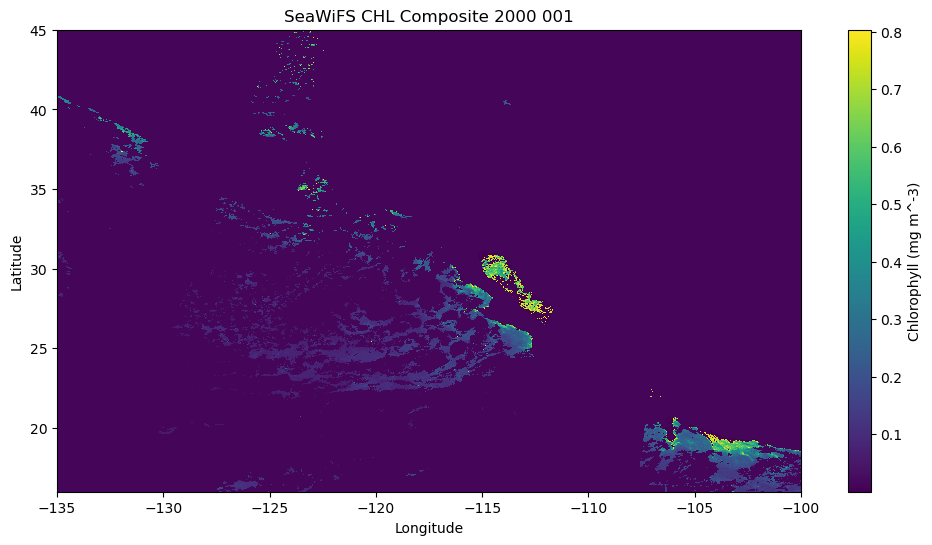

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from pyhdf.SD import SD, SDC

# --- Open your HDF file ---
hdf_file = "/Users/deliacarpenter/Desktop/Research/primary-productivity/data/chl_data/C2000001_chl_comp.hdf"
hdf = SD(hdf_file, SDC.READ)

# --- Select dataset ---
sds_name = list(hdf.datasets().keys())[0]  # 'chl_1997335_1997365'
sds = hdf.select(sds_name)
chl_data = sds[:]  # shape (3405, 3840)

# --- Handle fill values ---
fill_value = sds.attributes()['_FillValue']
chl_data = chl_data.astype(np.float32)
chl_data[chl_data == fill_value] = np.nan  # mask missing values

# --- Apply scaling (from attributes) ---
slope = sds.attributes()['Slope']
intercept = sds.attributes()['Intercept']
base = sds.attributes()['Base']

# Original equation: Base ** (Slope * data + Intercept)
chl_data_scaled = base ** (slope * chl_data + intercept)

# --- Approximate lat/lon grid ---
nrows, ncols = chl_data.shape
min_lat, max_lat = 16, 45
min_lon, max_lon = -135, -100

lats = np.linspace(max_lat, min_lat, nrows)
lons = np.linspace(min_lon, max_lon, ncols)
lon_grid, lat_grid = np.meshgrid(lons, lats)

# --- Plot ---
plt.figure(figsize=(12,6))
plt.pcolormesh(lon_grid, lat_grid, chl_data_scaled, shading='auto', cmap='viridis')
plt.colorbar(label='Chlorophyll (mg m^-3)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('SeaWiFS CHL Composite 2000 001')
plt.show()